# Ejercicio 2: *Clustering*

Agrupando colores. Vamos a crear imágenes con una cantidad fija de colores.

### 1. Importa las librerias

Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`

In [66]:
from sklearn.cluster import KMeans
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 2. Lee una imagen

Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`.

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el *K-Means*.

In [67]:
image = imread("data/da5266c6637115cfa8524bbc86d8f788.jpg")

In [68]:
image.shape

(600, 422, 3)

Muestra la imagen para ver que se ha cargado bien.

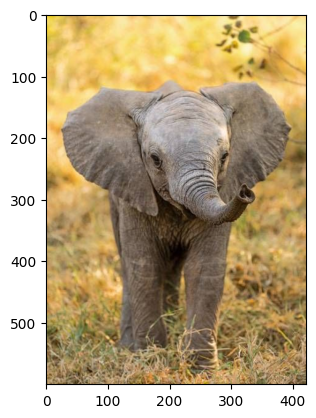

In [69]:
plt.imshow(image)

### 3. Modifica la estructura de la imagen

Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [70]:
X = image.reshape(-1,3)

In [71]:
X.shape

(253200, 3)

### 4. *K-means*

Haz un *K-means* con la imagen de entrada (con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida.

In [87]:
kmeans = KMeans(n_clusters=5, n_init='auto', random_state=42).fit(X)

### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el *K-means* entre otros parámetros de salida tiene `cluster_centers_` y `labels_`. Utilízalos para crear una nueva imagen (recuerda que las imágenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [88]:
kmeans.labels_

array([2, 2, 2, ..., 4, 3, 4])

In [89]:
kmeans.cluster_centers_

array([[154.82465643, 132.25378124,  93.54568834],
       [194.65335594, 165.96790392, 116.84369353],
       [243.53338396, 207.92203641, 121.36156386],
       [ 63.69479882,  47.79609639,  28.96521644],
       [112.75298693,  94.94504796,  71.16453826]])

In [90]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

### 6. Modifica la estructura de la imagen

Para trabajar con el *K-means* requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver a mostrarla debemos hacer el proceso inverso a el paso 3 (si has guardado la forma de la imagen original te resultará más facil hacer este paso).

In [91]:
segmented_img.astype('uint8')

array([[243, 207, 121],
       [243, 207, 121],
       [243, 207, 121],
       ...,
       [112,  94,  71],
       [ 63,  47,  28],
       [112,  94,  71]], dtype=uint8)

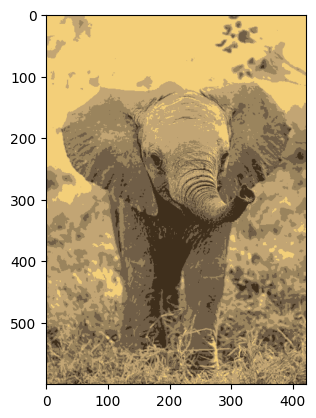

In [92]:
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img.astype('uint8'))

### 7. Imprime y guarda en tu ordenador la imagen resultante

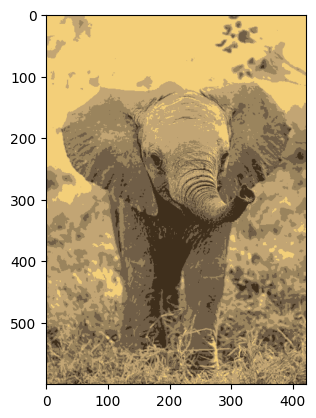

In [93]:
plt.imshow(segmented_img.astype('uint8'))
plt.savefig("imagen")

### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [94]:
def cluster_colors(image_path, n_colors, save=False, show=False):
    image = imread(image_path)
    X = image.reshape(-1,3)

    kmeans = KMeans(n_clusters=n_colors, n_init=10).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_img = segmented_img.reshape(image.shape)

    if show:
        plt.imshow(segmented_img.astype('uint8'))
    if save:
        plt.savefig("fun_imagen")


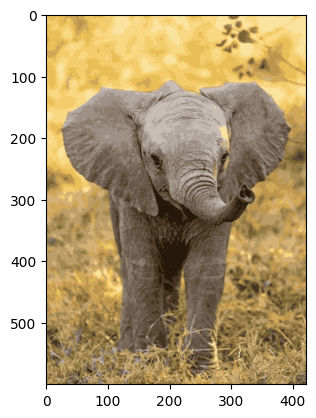

In [96]:
cluster_colors("da5266c6637115cfa8524bbc86d8f788.jpg", 20, True, True)